<a href="https://colab.research.google.com/github/Headworld/olaitan/blob/main/Rain_prediction_olaitan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# I imported all the python library 

In [7]:
ds=pd.read_csv("/content/drive/MyDrive/olaitan rain datasets/chuping_clean_data.csv", encoding= 'unicode_escape') 
# I mounted the Clean data of the Chuping dataset into Google Drive and then read it.  

In [16]:
from google.colab import data_table

data_table.enable_dataframe_formatter()
ds.head()

# To check out for the data and to ascertain that all the data are accurate
# We can apply filter range e.t.c

,Stnno,Year,Month,Day,Hour ( MST ),Pressure MSL ( Hpa ),Dry Bulb Temp ( ° C ),Dew point( ° C ),Relative Humidity( % ),Surface Wind Direction( ° ),Surface Wind Speed( m/s ),Rainfall Duration( min ),Rainfall Amount( mm )
0,48604,2012,1,1,1,1012.0,24.2,23.0,92,340,2.0,25,0.2
1,48604,2012,1,1,2,1011.8,23.5,22.6,94,10,2.3,60,2.2
2,48604,2012,1,1,3,1011.1,23.5,22.6,94,10,2.5,60,14.8
3,48604,2012,1,1,4,1010.7,23.5,22.6,94,20,2.6,60,17.2
4,48604,2012,1,1,5,1010.1,23.4,22.6,95,20,2.6,60,8.2


In [17]:
#Next is to programmatically check for if there are any missing value. 
#I have clean this manually in the data stream before mounting it. However, I check again to ascertain no missing value
ds.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Stnno   Year  Month    Day  Hour ( MST )  Pressure MSL ( Hpa )  \
0     False  False  False  False         False                 False   
1     False  False  False  False         False                 False   
2     False  False  False  False         False                 False   
3     False  False  False  False         False                 False   
4     False  False  False  False         False                 False   
...     ...    ...    ...    ...           ...                   ...   
1890  False  False  False  False         False                 False   
1891  False  False  False  False         False                 False   
1892  False  False  False  False         False                 False   
1893  False  False  False  False         False                 False   
1894  False  False  False  False         False                 False   

      Dry Bulb Temp ( ° C )  Dew point( ° C )  Relative Humidity( % )  \


In [ ]:
#To understand the relationship that exist between the parameters in effect with the Amount of Rainfall.
# such as the Pressure, Dew Point, Dry Bulb, Relative Humidity, Surface Wind Direction, Surface Wind Speed, Rainfall Duration and Rainfall Amount.
# I will imploy Perason Correlation Coefficient to better perform the correlation analysis and to do this
# I will classify the Amount of Rainfall as Dependent variable and other parameters as Independent variables

In [21]:
x = ds.iloc[:,:12].values
y = ds.iloc[:,12].values

In [22]:
x

array([[ 4.8604e+04,  2.0120e+03,  1.0000e+00, ...,  3.4000e+02,
         2.0000e+00,  2.5000e+01],
       [ 4.8604e+04,  2.0120e+03,  1.0000e+00, ...,  1.0000e+01,
         2.3000e+00,  6.0000e+01],
       [ 4.8604e+04,  2.0120e+03,  1.0000e+00, ...,  1.0000e+01,
         2.5000e+00,  6.0000e+01],
       ...,
       [ 4.8604e+04,  2.0140e+03,  1.2000e+01, ...,  3.0000e+01,
         1.9000e+00, -1.0000e+00],
       [ 4.8604e+04,  2.0140e+03,  1.2000e+01, ...,  1.8000e+02,
         1.0000e+00,  4.0000e+01],
       [ 4.8604e+04,  2.0140e+03,  1.2000e+01, ...,  1.5000e+02,
         1.2000e+00,  6.0000e+01]])

In [23]:
y

array([ 0.2,  2.2, 14.8, ...,  1.8,  2.6,  0.8])

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [40]:
x_train

array([[4.8604e+04, 2.0120e+03, 8.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        6.0000e+01],
       [4.8604e+04, 2.0120e+03, 1.0000e+00, ..., 2.0000e+01, 1.7000e+00,
        6.0000e+01],
       [4.8604e+04, 2.0130e+03, 5.0000e+00, ..., 9.0000e+01, 1.0000e+00,
        6.0000e+01],
       ...,
       [4.8604e+04, 2.0140e+03, 1.0000e+01, ..., 3.0000e+02, 5.0000e-01,
        6.0000e+01],
       [4.8604e+04, 2.0120e+03, 1.1000e+01, ..., 1.0000e+01, 5.0000e-01,
        6.0000e+01],
       [4.8604e+04, 2.0130e+03, 1.0000e+00, ..., 1.1000e+02, 5.0000e-01,
        6.0000e+01]])

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state = 0)   #train test 
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [42]:
ypred = regressor.predict(x_test)

In [43]:
ypred

array([ 2.026,  0.646,  1.669,  3.441,  3.531,  4.149,  3.731,  0.813,
        1.273,  4.203,  1.216,  2.817,  4.207,  3.37 ,  7.052,  3.98 ,
        1.338,  5.505,  3.731,  2.517,  2.442,  4.082,  3.618,  6.492,
       10.213,  4.028,  2.998,  5.74 ,  4.132,  1.632,  3.049,  1.493,
        4.951,  2.258,  0.375,  3.614,  4.494,  6.169,  7.146,  2.167,
        9.559,  3.132,  1.402,  3.435,  2.888,  6.142,  0.639,  0.759,
        0.816,  1.752,  4.96 ,  5.089,  0.449,  3.94 ,  3.744,  0.88 ,
        1.869, 13.276,  1.649,  6.225,  3.745,  2.803,  2.551,  3.767,
        1.6  ,  6.295,  1.594, 10.612, 16.137,  5.186,  6.333,  3.087,
        8.687,  2.279,  2.047,  2.452,  3.778,  1.747,  3.054,  1.613,
        2.251,  0.853,  5.313,  2.521,  1.034,  3.077,  1.514,  0.916,
        2.277,  3.994,  1.316,  0.857,  2.056,  0.988,  2.372,  4.137,
        2.449,  3.382,  3.845,  2.674,  2.851,  1.662,  3.017,  1.837,
        4.882,  0.62 ,  1.783,  4.392,  1.888,  2.278,  1.016,  1.784,
      

In [44]:
y_test.shape

(379,)

In [46]:
from sklearn.metrics import r2_score # Checking the test for accuracy
r2_score(y_test,ypred)

0.033371768278908975

In [47]:
x_train.shape

(1516, 12)

In [48]:
y_train.shape

(1516,)

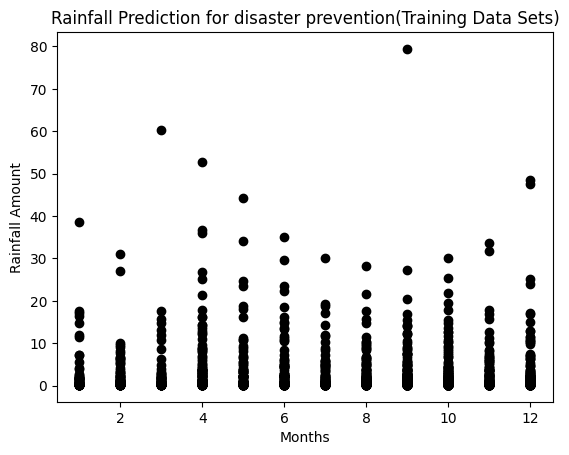

In [58]:
plt.scatter(x_train[:,2],y_train,color='black')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Months')
plt.ylabel('Rainfall Amount')
plt.show()     
#showing the Monthly impart of Rainfall Amount. As we see below, 
#1. September has the highest peak amount of rainfall
#2. There is high concentration of rainfall from June to August with the amount of Rainfall at 0.10mm - 20.40mm 

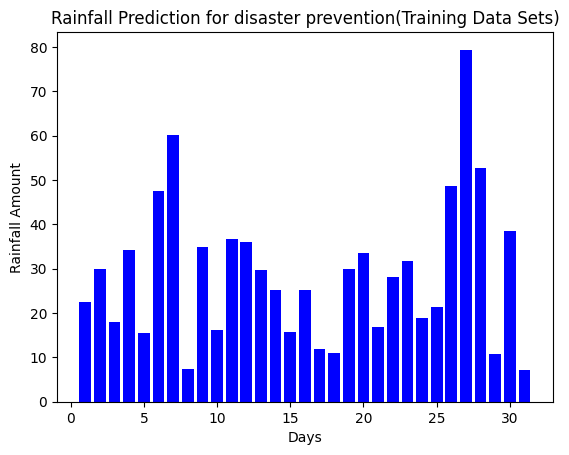

In [67]:
plt.bar(x_train[:,3],y_train,color='blue')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Days')
plt.ylabel('Rainfall Amount')
plt.show()     
#showing the Daily impart of Rainfall Amount. As we see below, 
#1. It was on the 27th of September which has the highest peak amount of rainfall
#2. The data shows that between 10th to 21st of every month, the amount of Rainfall in milimeter has a very similar behaviour

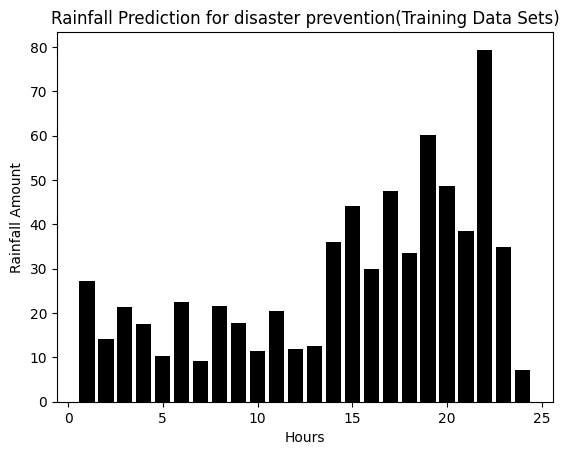

In [69]:
plt.bar(x_train[:,4],y_train,color='black')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Hours')
plt.ylabel('Rainfall Amount')
plt.show()     
#showing the Hourlyimpart of Rainfall Amount. As we see below, 
#1. It was around 10pm (i.e. 22:00) on the 27th of September we had the highest peak amount of rainfall
#2. The data shows that it was usually around noon (especially around 2pm) and/to evening (especially 11pm) we usually experience High amount of Rainfall in milimeter with a very similar behaviour

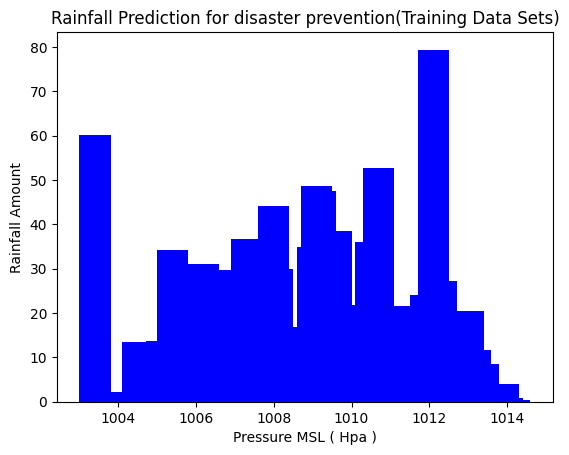

In [72]:
plt.bar(x_train[:,5],y_train,color='blue')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Pressure MSL ( Hpa )')
plt.ylabel('Rainfall Amount')
plt.show()     
#showing the Relationship of Atmospheric Pressure on Rainfall Amount. As we see below, 
# It was seen that Low pressure often means High rainfall with an exception 
# where we have the highest peak of rainfall when the atmospheric pressure rose to 1012Hpa. 
# This is justifiable because from the data prior to the event, there was a spartial rainfall 


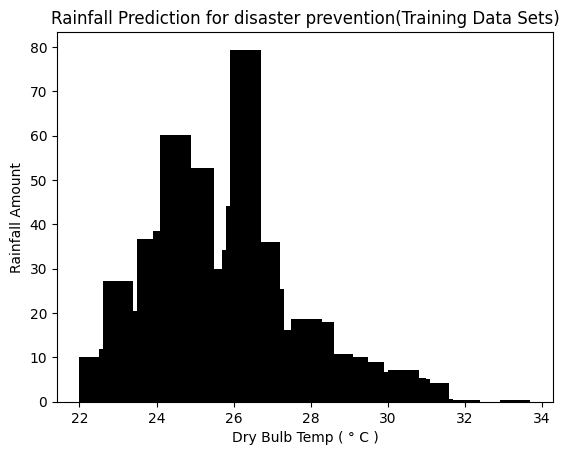

In [74]:
plt.bar(x_train[:,6],y_train,color='black')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Dry Bulb Temp ( ° C )')
plt.ylabel('Rainfall Amount')
plt.show()     
#The lower the Dry Bulb Temp, the Higher the Humidity and the Higher the Amount of rainfall. 
# The data clearly shows that the lower amount of DBT contibuted to Higher amount of rainfall

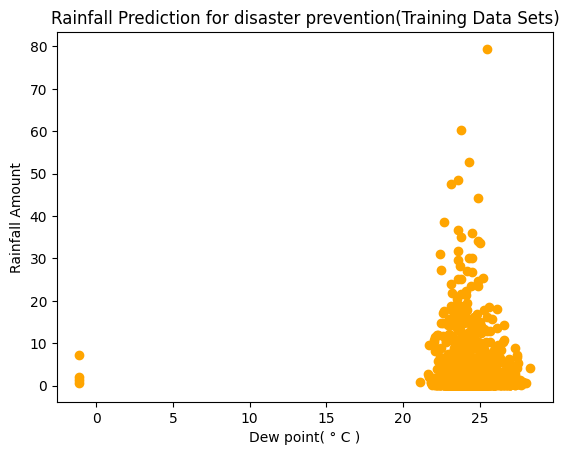

In [76]:
plt.scatter(x_train[:,7],y_train,color='orange')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Dew point( ° C )')
plt.ylabel('Rainfall Amount')
plt.show()     
#The higher the dew point rises, the greater the amount of moisture in the air which lead to the Higher Amonut of rainfall. 
# The data clearly shows that the higher amount of DP contibuted to Higher amount of rainfall

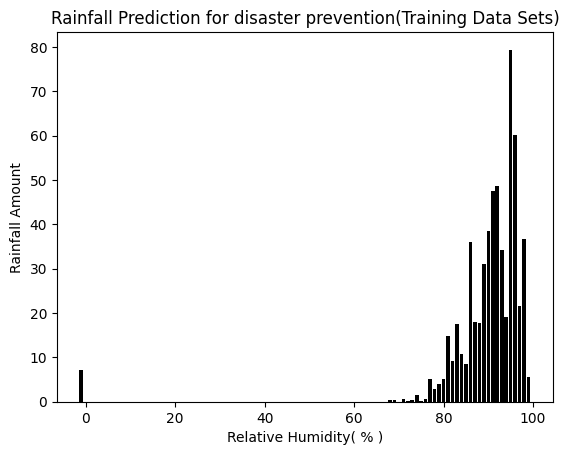

In [78]:
plt.bar(x_train[:,8],y_train,color='black')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Relative Humidity( % )')
plt.ylabel('Rainfall Amount')
plt.show()     
#The Relative Humidity is a ratio, expressed in percent, of the amount of atmospheric moisture present relative to the amount that would be present 
# if the air were saturated. 
# Relative humidity is a function of both moisture content and temperature.. 
# The data clearly shows that the higher the Relative Humity in percentage the higher it contributed to the amount of rainfall

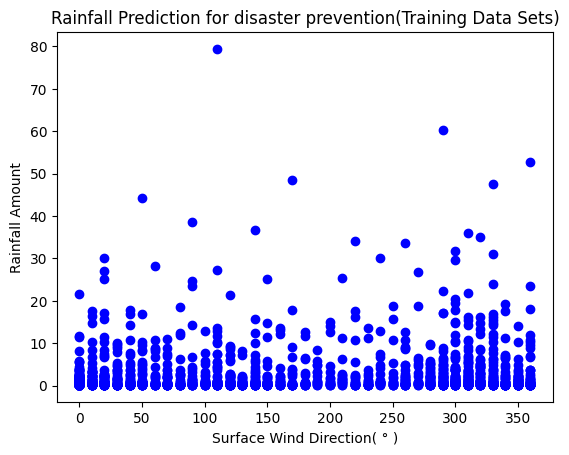

In [82]:
plt.scatter(x_train[:,9],y_train,color='blue')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Surface Wind Direction( ° )')
plt.ylabel('Rainfall Amount')
plt.show()     
# The Winds blowing from the water bodies to the land bring with them rain and precipitation. Those that blow the opposite way bring about dryness. 
# Therefore, the direction of the wind at a certain time matters on whether a certain area is likely to receive rain or not.


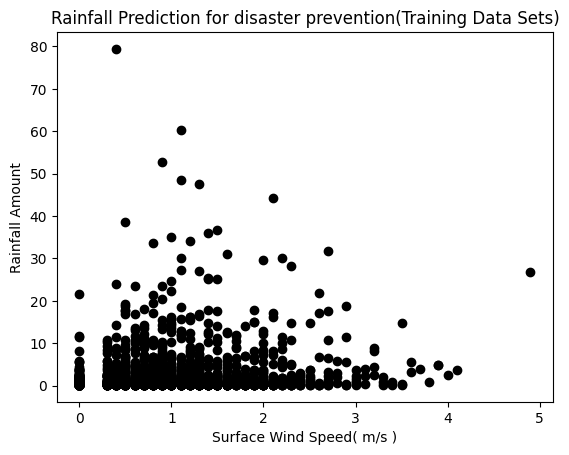

In [85]:
plt.scatter(x_train[:,10],y_train,color='black')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Surface Wind Speed( m/s )')
plt.ylabel('Rainfall Amount')
plt.show()     
# The Winds blowing from the water bodies to the land bring with them rain and precipitation. Those that blow the opposite way bring about dryness. 
# Therefore, the direction of the wind at a certain time matters on whether a certain area is likely to receive rain or not.
# The data shows that the higher the sind speed, the higher the amount of rainfall over time. 

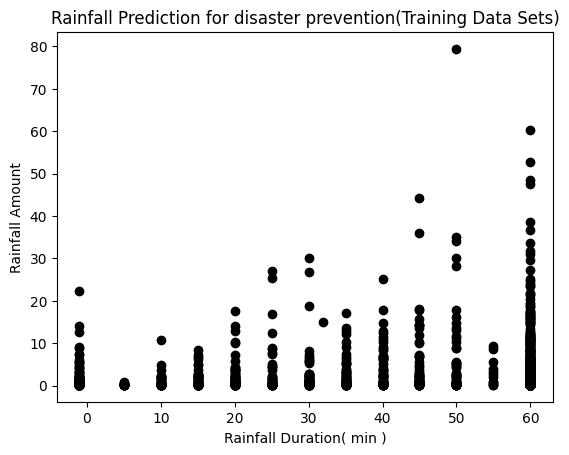

In [88]:
plt.scatter(x_train[:,11],y_train,color='black')
plt.title('Rainfall Prediction for disaster prevention(Training Data Sets)')
plt.xlabel('Rainfall Duration( min )')
plt.ylabel('Rainfall Amount')
plt.show()     
# The data shows that the higher the rainfall duration, the more we have high amount of rainfall. 

In [96]:
#After indepth analysis on the Chupping Datasets, 
#I then look at the correlations of the Dependent variables (Rainfall Amount) and the Indepent variable(s)
# Pearson Correlation
ds.corr(method ='pearson')
#Now I use Pandas ds.corr() function to find the correlation among the parameter of the datasets.
# As mentioned earlier, the correlation of a variable with itself is 1, all the diagonal values are 1.00

,Stnno,Year,Month,Day,Hour ( MST ),Pressure MSL ( Hpa ),Dry Bulb Temp ( ° C ),Dew point( ° C ),Relative Humidity( % ),Surface Wind Direction( ° ),Surface Wind Speed( m/s ),Rainfall Duration( min ),Rainfall Amount( mm )
Stnno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,1.000000,0.258786,-0.049599,-0.055986,0.178514,0.069726,0.025191,-0.057287,0.025515,-0.072609,-0.163376,-0.014263
Month,NaN,0.258786,1.000000,0.003769,-0.039949,0.197475,-0.120623,-0.048709,0.119551,-0.005143,-0.046859,-0.066350,-0.058214
Day,NaN,-0.049599,0.003769,1.000000,0.054641,0.013800,0.049979,0.072790,0.008032,-0.051653,-0.004415,0.004797,-0.012831
Hour ( MST ),NaN,-0.055986,-0.039949,0.054641,1.000000,-0.064402,0.235514,0.143290,-0.168715,0.026369,0.082627,0.249821,0.069681
Pressure MSL ( Hpa ),NaN,0.178514,0.197475,0.013800,-0.064402,1.000000,-0.329748,-0.216955,0.197060,-0.081611,-0.071833,0.032613,-0.079314
Dry Bulb Temp ( ° C ),NaN,0.069726,-0.120623,0.049979,0.235514,-0.329748,1.000000,0.642904,-0.612754,0.176853,0.200905,-0.183683,-0.049396
Dew point( ° C ),NaN,0.025191,-0.048709,0.072790,0.143290,-0.216955,0.642904,1.000000,0.202473,0.092363,0.047757,-0.035053,-0.035241
Relative Humidity( % ),NaN,-0.057287,0.119551,0.008032,-0.168715,0.197060,-0.612754,0.202473,1.000000,-0.139450,-0.248517,0.198011,0.023319
Surface Wind Direction( ° ),NaN,0.025515,-0.005143,-0.051653,0.026369,-0.081611,0.176853,0.092363,-0.139450,1.000000,0.318813,-0.003356,0.120958
